In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
# sys.path.append("/home/sreela/Installs/anaconda2/lib")
from ROOT import gROOT, TCanvas, TFile, TH1F, TTree, TChain
from matplotlib.lines import Line2D
from matplotlib import cm
    
plt.rcParams["figure.figsize"] = (15, 10) # (w, h)
plt.rcParams["font.size"] = 22
plt.rcParams['lines.markersize'] = 12

bg = 'white'
plt.rcParams["figure.facecolor"] = bg
plt.rcParams["axes.facecolor"] = bg
plt.rcParams["savefig.facecolor"] = bg
plt.rcParams["errorbar.capsize"] = 12

zenith = [20, 30, 35, 40, 45, 50, 55, 60, 65]
myfmt = ['ko', 'rv', 'bD', 'g^', 'ks', 'r<', 'bp', 'g>', 'k*', 'r+']
zenfmt = ['kd', 'kd', 'kd', 'kd', 'kd', 'kd', 'kd', 'kd', 'kd', 'kd']
noise = [200, 250, 300, 350, 450]


ImportError: /home/sreela/Installs/anaconda2/lib/./libNet.so: undefined symbol: SSL_library_init

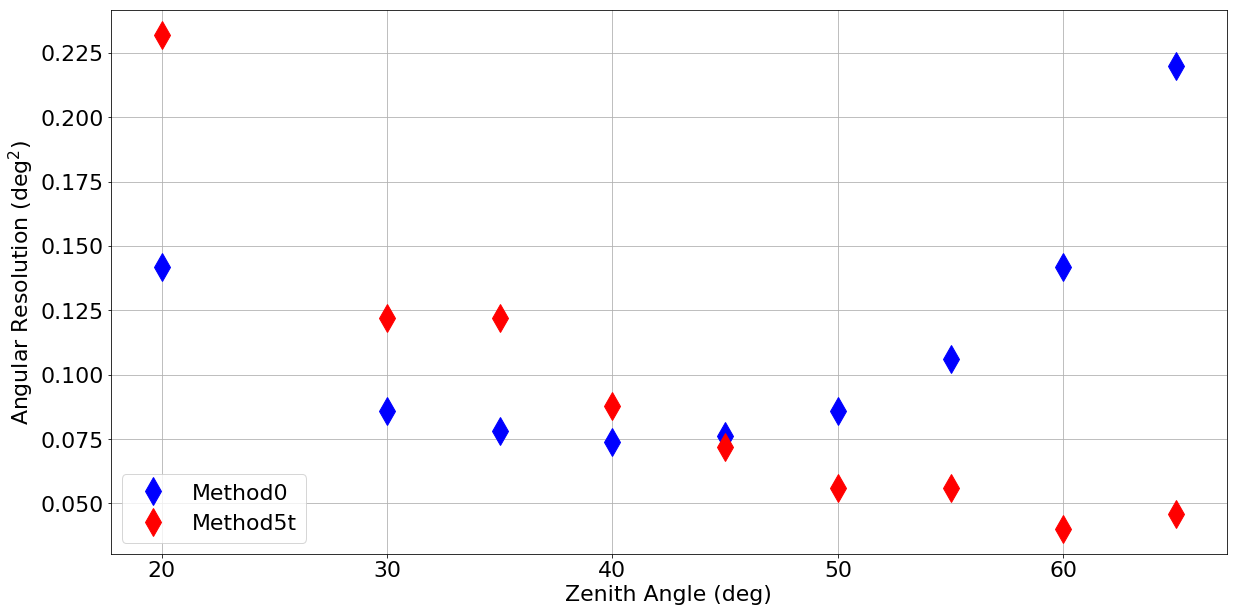

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18, 12) # (w, h)
plt.rcParams["font.size"] = 22

color = 'black'
plt.rcParams['text.color'] = color
plt.rcParams['axes.labelcolor'] = color
plt.rcParams['xtick.color'] = color
plt.rcParams['ytick.color'] = color
plt.rcParams['lines.markersize'] = 20

bg = 'white'
plt.rcParams["figure.facecolor"] = bg
plt.rcParams["axes.facecolor"] = bg
plt.rcParams["savefig.facecolor"] = bg

zenith = [20, 30, 35, 40, 45, 50, 55, 60, 65]
contain_reg = [0.142, 0.086, 0.078, 0.074, 0.076, 0.086,  0.106, 0.142, 0.220]
contain_disp = [0.232, 0.122, 0.122, 0.088, 0.072, 0.056, 0.056, 0.040, 0.046]

plt.plot(zenith, contain_reg, 'db', linestyle='None', label='Method0')
plt.plot(zenith, contain_disp,'dr', linestyle='None', label='Method5t')
plt.xlabel("Zenith Angle (deg)")
plt.ylabel(r"Angular Resolution (deg$^2$)")
plt.grid()
plt.legend()

plt.show()


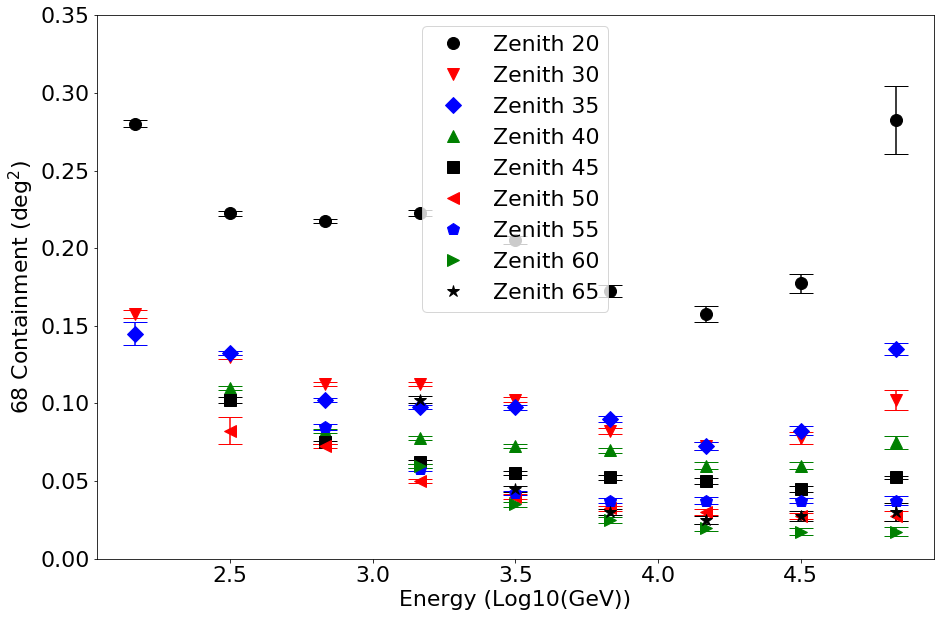

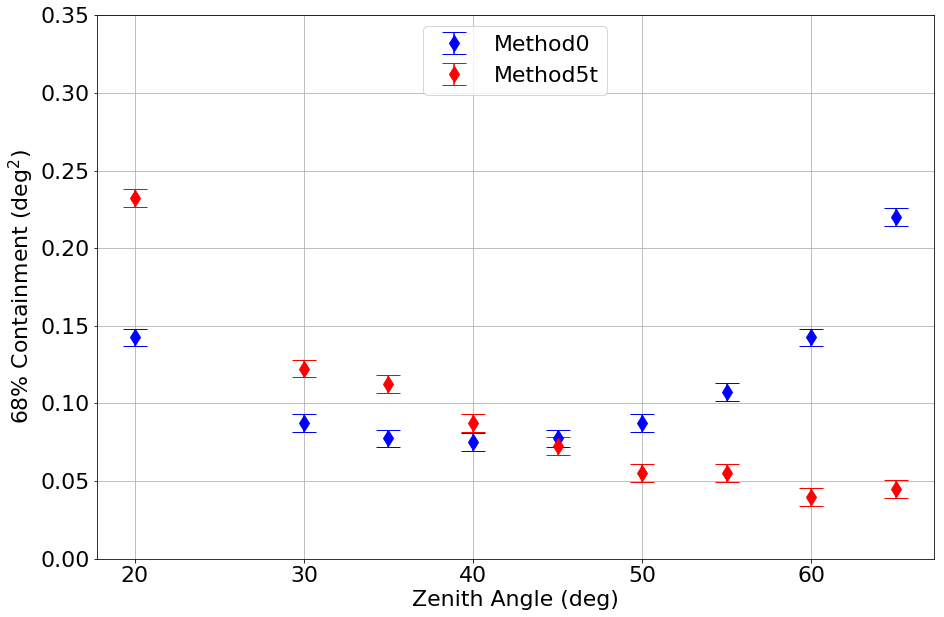

20 ko
30 rv
35 bD
40 g^
45 ks
50 r<
55 bp
60 g>
65 k*


/home/sreela/.local/lib/python2.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars


In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ROOT import gROOT, TCanvas, TFile, TH1F, TTree, TChain
from matplotlib.lines import Line2D
from matplotlib import cm

plt.rcParams["figure.figsize"] = (15, 10) # (w, h)
plt.rcParams["font.size"] = 22
plt.rcParams['lines.markersize'] = 12

bg = 'white'
plt.rcParams["figure.facecolor"] = bg
plt.rcParams["axes.facecolor"] = bg
plt.rcParams["savefig.facecolor"] = bg
plt.rcParams["errorbar.capsize"] = 12

zenith = [20, 30, 35, 40, 45, 50, 55, 60, 65]
myfmt = ['ko', 'rv', 'bD', 'g^', 'ks', 'r<', 'bp', 'g>', 'k*']
mycolor = ['k', 'r', 'b', 'g', 'k', 'r', 'b', 'g', 'k']
mypoint = ['o', 'v', 'D', '^', 's', '<', 'p', '>', '*']
noise = [200, 250, 300, 350, 450]

energy = np.linspace(2, 5, 10)
zen_range = range(9)

contain_reg = np.zeros(len(zenith))
contain_reg_std = np.zeros(len(zenith))

contain_disp = np.zeros(len(zenith))
contain_disp_std = np.zeros(len(zenith))

# fig, ax = plt.subplots()
# cc = TChain("diagnosticTree");
# for i in zen_range:
#     cc.AddFile("zen{}/zendisp.root".format(zenith[i]))
# nentries = cc.GetEntries()
# print nentries
# for j in range(nentries):
#     cc.GetEntry(j)
#     if((j%1000)==0):
#         plt.scatter(cc.fEnergyGeV, cc.PrimaryZenithDeg, c=cc.DevDeg, marker='.', cmap=cm.jet, alpha=0.1)
#         if((j%100000)==0):
#             print "{}\r".format(j),
# plt.xlim((100, 100000))            
# plt.ylim((15, 70))            
# plt.xlabel("Energy (Log10(GeV))")
# plt.xscale("log")
# plt.ylabel("Zenith Angle (deg)")
# plt.grid()
# color_bar = plt.colorbar()
# color_bar.set_alpha(1)
# color_bar.draw_all()
# plt.savefig("energy_zenith_dev_cb.png")
# plt.show()

def fetch_68_containment(fname, tcut):
    maxbin = 10
    nbins = 4000
    f = TFile(fname)
    tr = f.Get("diagnosticTree")
    histo = TH1F("histo", "", nbins, 0, maxbin)
    tr.Draw("DevDeg>>histo", tcut, "COLZ")
    std = histo.GetStdDev()/np.sqrt(histo.GetEntries())
    iter=0;
    while((iter<nbins) and ((histo.Integral(0, iter))<(histo.GetEntries()*.68))):
        iter=iter+1
    contain = (iter*maxbin*1.0)/nbins
    return (contain, std)

plt.figure()    
for i in zen_range:
    for j in range(9):
        for k in range(noise.length()):
            contain, std = fetch_68_containment("sims_disp/z{}_n{}.root".format(zenith[i], noise[k]),
                                                  "fEnergyGeV>{}&&fEnergyGeV<{}".format(pow(10, energy[j]), pow(10, energy[j+1])))
            if contain > 0:
                plt.errorbar((energy[j+1]+energy[j])/2, contain, yerr=std, fmt=myfmt[i])
    print zenith[i], myfmt[i]
    contain_reg[i], contain_reg_std[i] = fetch_68_containment("sims_reg/z{}_n{}.root".format(zenith[i], noise[k]), "")
    contain_disp[i], contain_disp_std[i] = fetch_68_containment("sims_disp/z{}_n{}.root".format(zenith[i], noise[k]), "")

custom_lines=[Line2D([0], [0], linestyle='None', marker=mypoint[i], color=mycolor[i]) for i in zen_range]
labels = ["Zenith {}".format(zenith[i]) for i in zen_range]
plt.ylim((0, 0.35))
plt.xlabel("Energy (Log10(GeV))")
plt.ylabel(r"$68%$ Containment (deg$^2$)")
plt.legend(custom_lines, labels)
plt.savefig("disp_vs_energy.png")
plt.show()

plt.figure()
plt.errorbar(zenith, contain_reg, yerr=std, fmt='db', label='Method0')
plt.errorbar(zenith, contain_disp, yerr=std, fmt='dr', label='Method5t')
plt.xlabel("Zenith Angle (deg)")
plt.ylabel(r"68% Containment (deg$^2$)")
plt.ylim((0, 0.35))
plt.grid()
plt.legend(loc=9)
plt.savefig("disp_vs_reg.png") 
plt.show()

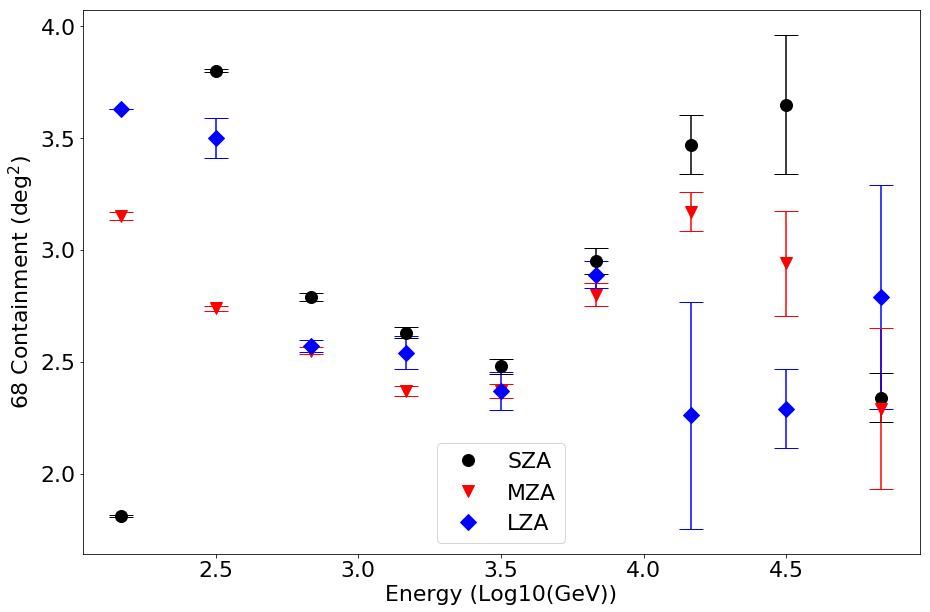

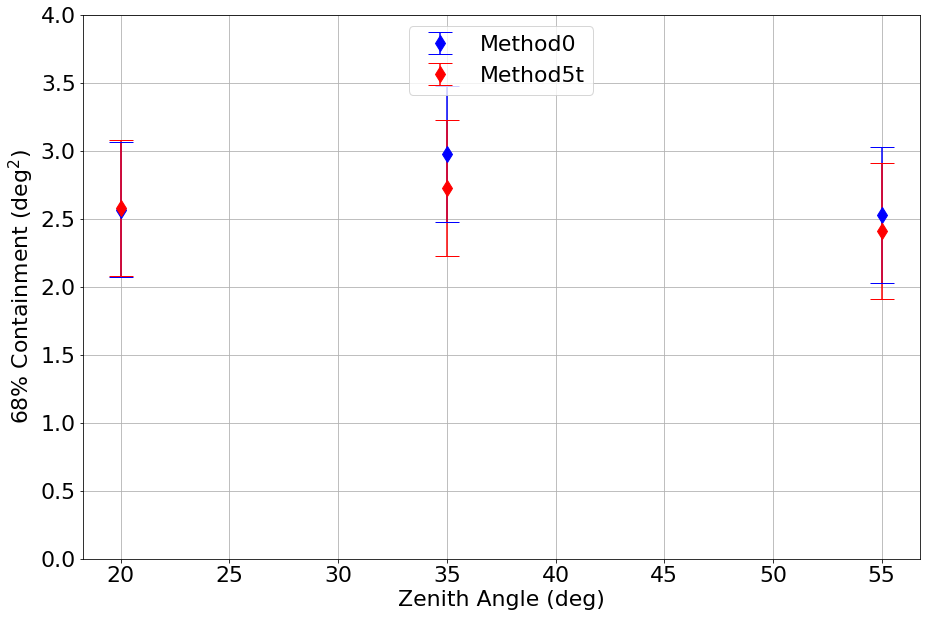

SZA ko
MZA rv
LZA bD
[2.53 2.98 2.57]
[2.41 2.73 2.58]


In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ROOT import gROOT, TCanvas, TFile, TH1F, TTree, TChain
from matplotlib.lines import Line2D
from matplotlib import cm

plt.rcParams["figure.figsize"] = (15, 10) # (w, h)
plt.rcParams["font.size"] = 22
plt.rcParams['lines.markersize'] = 12

bg = 'white'
plt.rcParams["figure.facecolor"] = bg
plt.rcParams["axes.facecolor"] = bg
plt.rcParams["savefig.facecolor"] = bg
plt.rcParams["errorbar.capsize"] = 12

zen = [55, 35, 20]
zenith = ["SZA", "MZA", "LZA"]
myfmt = ['ko', 'rv', 'bD']
mycolor = ['k', 'r', 'b']
mypoint = ['o', 'v', 'D']

energy = np.linspace(2, 5, 10)
zen_range = range(3)

contain_reg = np.zeros(3)
contain_reg_std = np.zeros(3)

contain_disp = np.zeros(3)
contain_disp_std = np.zeros(3)

def fetch_68_containment(fname, tcut):
    maxbin = 900
    nbins = 90000
    f = TFile(fname)
    tr = f.Get("diagnosticTree")
    histo = TH1F("histo", "", nbins, 0, maxbin)
    tr.Draw("DevDeg>>histo", tcut, "COLZ")
    std = histo.GetStdDev()/np.sqrt(histo.GetEntries())
    iter=0;
    while((iter<nbins) and ((histo.Integral(0, iter))<(histo.GetEntries()*.68))):
        iter=iter+1
    contain = (iter*maxbin*1.0)/nbins
    return (contain, std)

plt.figure()    
for i in zen_range:
    for j in range(len(energy)-1):
        contain, std = fetch_68_containment("zen_range/disp_{}.root".format(zenith[i]),
                                                  "fEnergyGeV>{}&&fEnergyGeV<{}".format(pow(10, energy[j]), pow(10, energy[j+1])))
        if contain > 0:
            plt.errorbar((energy[j+1]+energy[j])/2, contain, yerr=std, fmt=myfmt[i])
    print zenith[i], myfmt[i]
    contain_reg[i], contain_reg_std[i] = fetch_68_containment("zen_range/reg_{}.root".format(zenith[i]), "")
    contain_disp[i], contain_disp_std[i] = fetch_68_containment("zen_range/disp_{}.root".format(zenith[i]), "")

custom_lines=[Line2D([0], [0], linestyle='None', marker=mypoint[i], color=mycolor[i]) for i in zen_range]
labels = ["{}".format(zenith[i]) for i in zen_range]
# plt.ylim((0, 4.0))
plt.xlabel("Energy (Log10(GeV))")
plt.ylabel(r"$68%$ Containment (deg$^2$)")
plt.legend(custom_lines, labels)
plt.savefig("disp_vs_energy_crab.png")
plt.show()

plt.figure()
plt.errorbar(zen, contain_reg, yerr=std, fmt='db', label='Method0')
plt.errorbar(zen, contain_disp, yerr=std, fmt='dr', label='Method5t')
print contain_reg
print contain_disp
plt.xlabel("Zenith Angle (deg)")
plt.ylabel(r"68% Containment (deg$^2$)")
plt.ylim((0, 4.0))
plt.grid()
plt.legend(loc=9)
plt.savefig("disp_vs_reg_crab.png") 
plt.show()

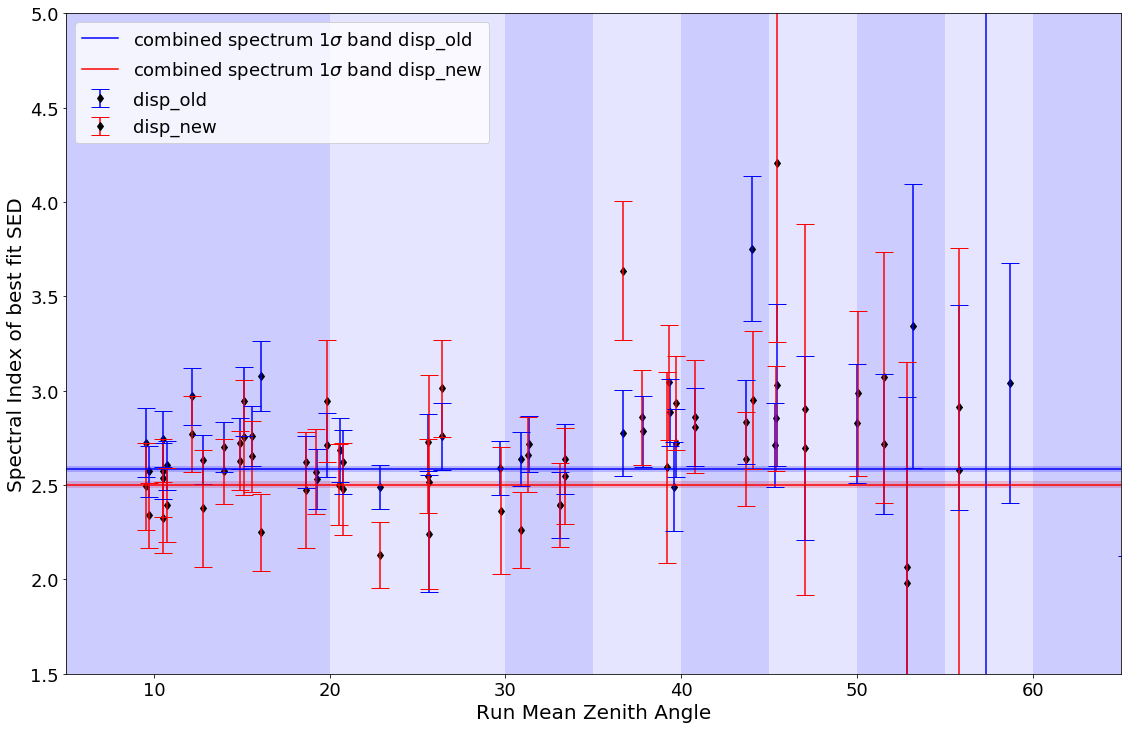

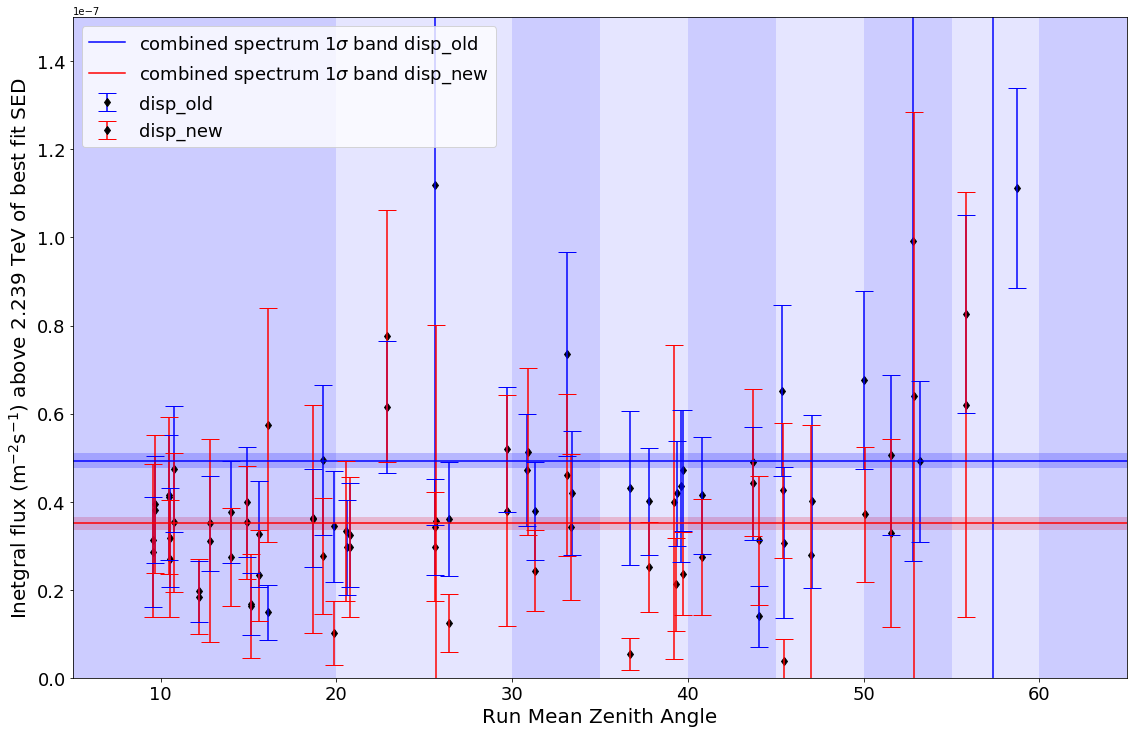

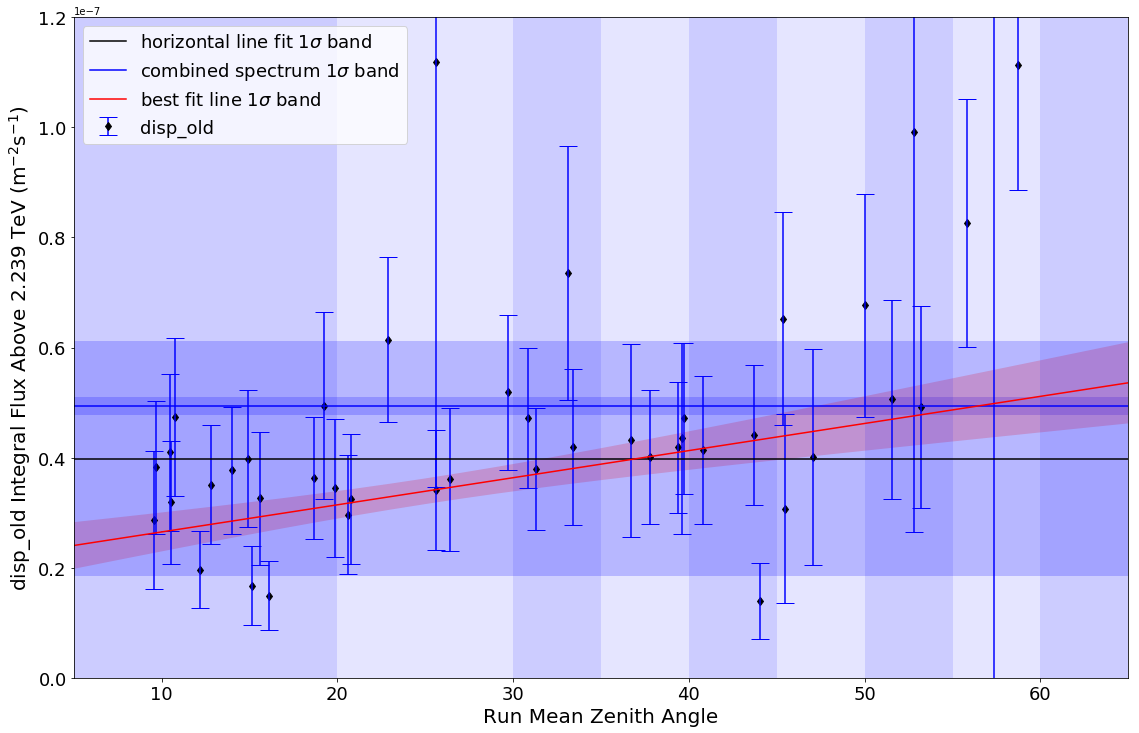

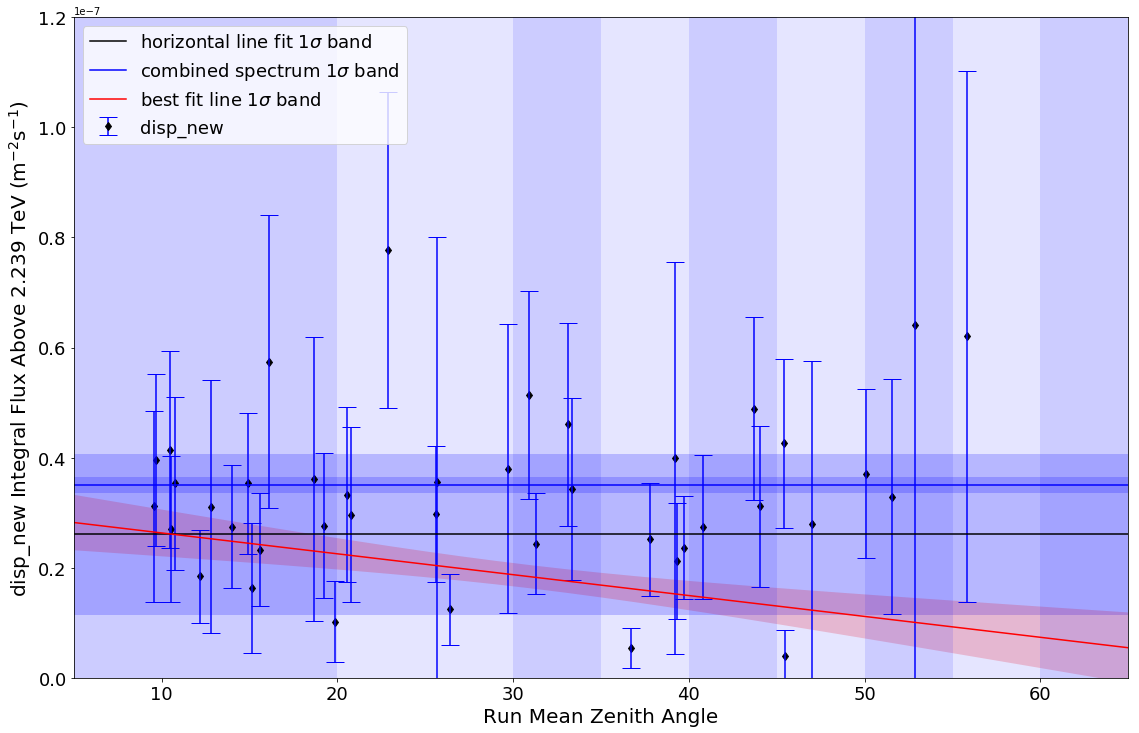

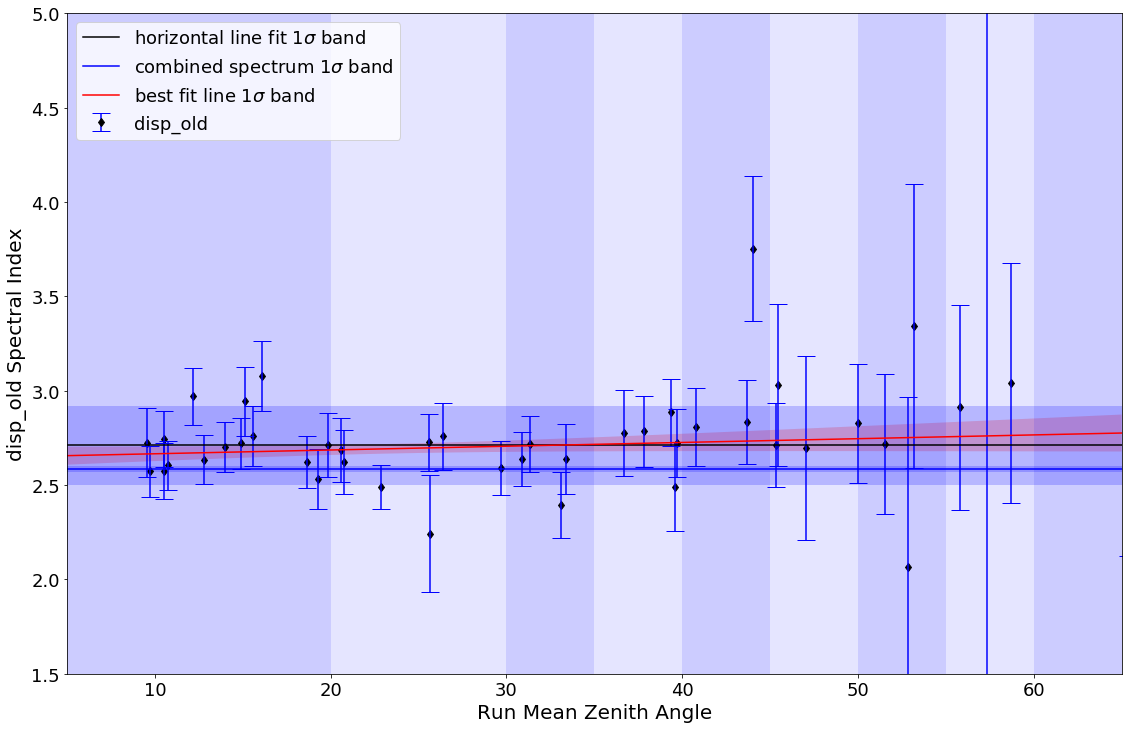

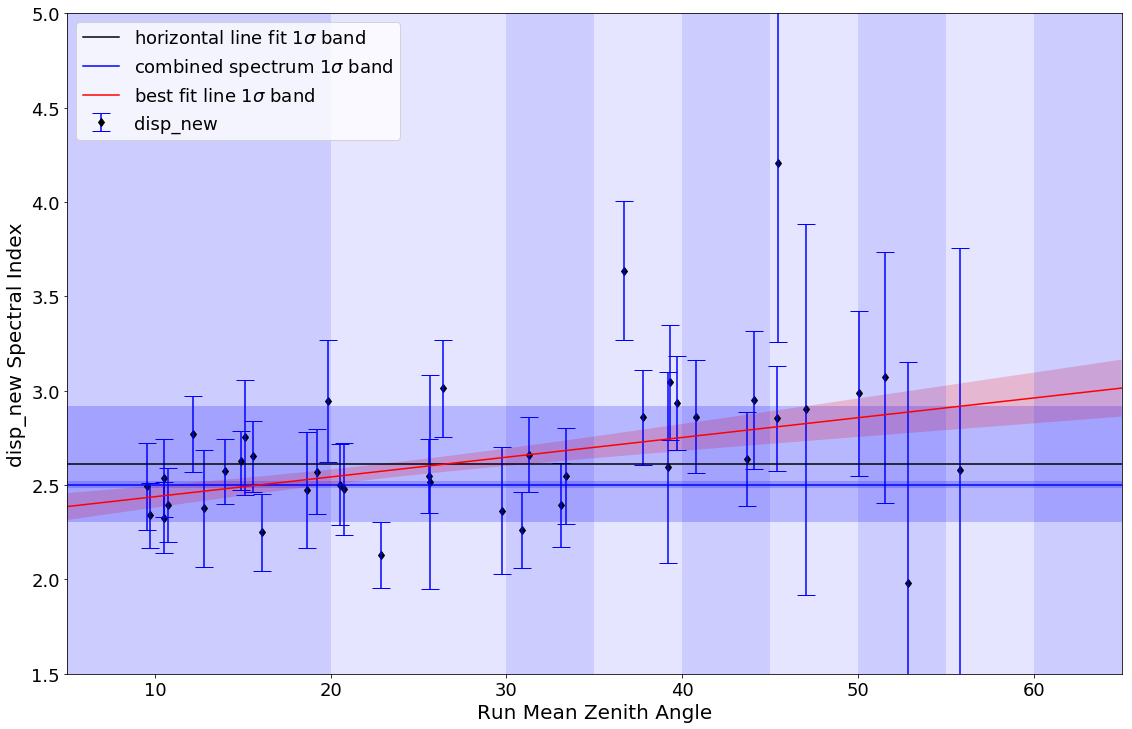

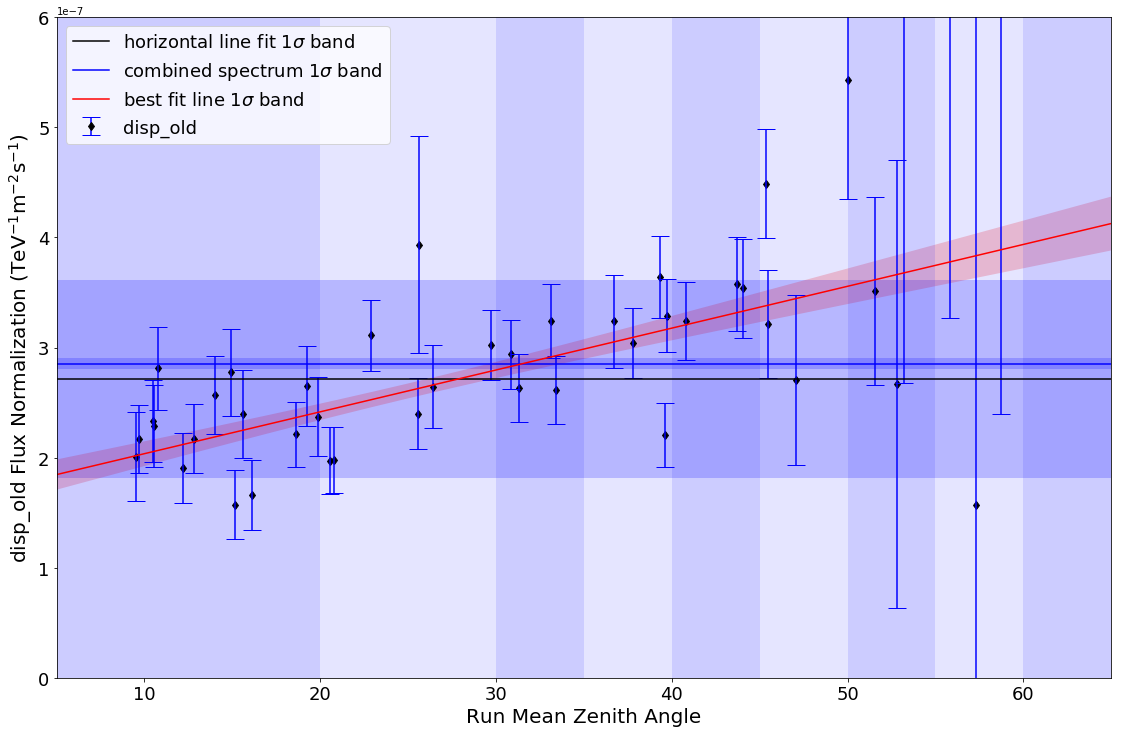

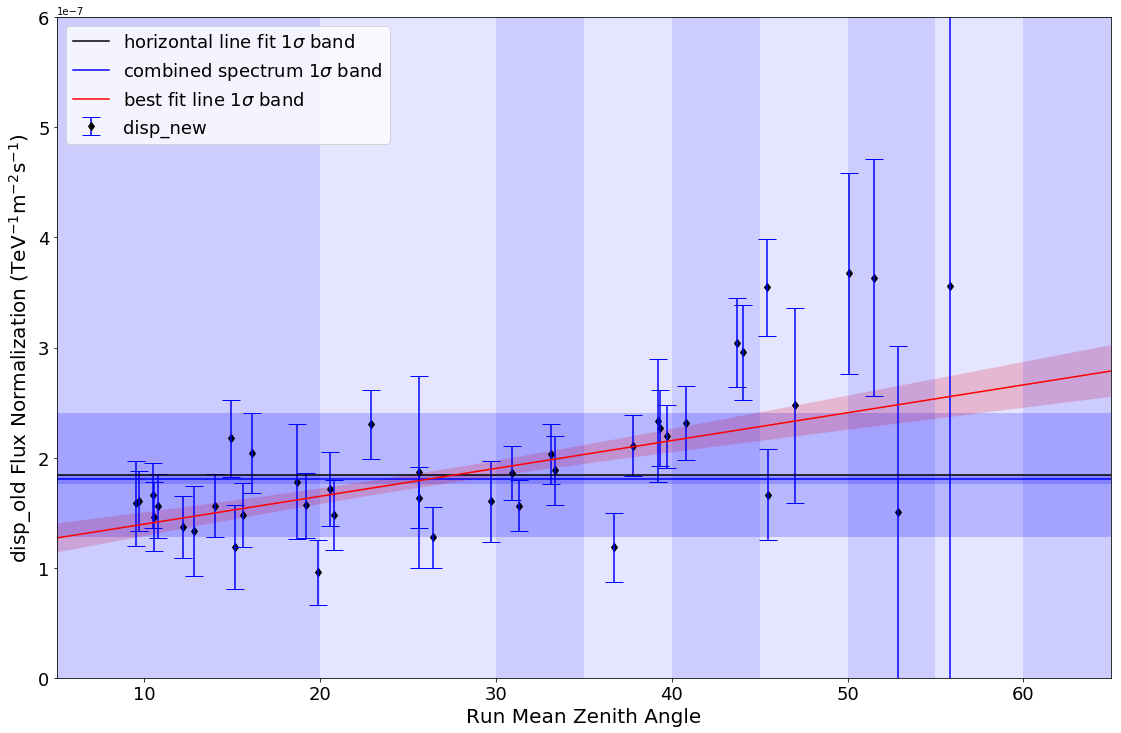

-----------------------------------------------INDEX-----------------------------------------------------
Method                                   &     Value  &     Uncertainty &     chi^2/dof  \\         
Method0 horizontal line fit              &$    2.712 $&$   0.21  $&$   0.83  $\\        
Method0 combined spectrum                &$    2.586 $&$   0.02  $&$   1.14  $\\        
Method0 best fit line                    &Slope= 0.002 &$\pm$$ 0.002 $&$   0.823 $\\        
Method5t horizontal line fit             &$    2.612 $&$   0.31  $&$   1.18  $\\        
Method5t combined spectrum               &$    2.502 $&$   0.02  $&$   1.19  $\\        
Method5t best fit line                   &Slope= 0.010 &$\pm$$ 0.003 $&$   0.941 $\\        
---------------------------------------------------------------------------------------------------------
-----------------------------------------------INTEGRAL FLUX---------------------------------------------
Method                                 

In [5]:
import numpy as np
import os 
import matplotlib.pyplot as plt
from scipy.odr import *

def chi_sq1(com_val, com_err, a, a_err, anum):
	a_fit = com_val
	a_fit_err = com_err*np.ones(anum)
	a_chi_sq1 = np.sum(((a-com_val*np.ones(anum))/a_err)**2)/(anum)
	return a_fit, a_fit_err, a_chi_sq1
def chi_sq2(a, a_err, anum):
	a_fit=np.average(a, weights=1/a_err)
	a_fit_err = np.sqrt(np.average((a-a_fit)**2, weights=1/a_err))
	a_chi_sq2 = np.sum(((a-a_fit*np.ones(anum))/a_err)**2)/(anum-1)
	return a_fit, a_fit_err, a_chi_sq2
def chi_sq3(zen, t, tt, a, a_err, anum):
	p, C_p = np.polyfit(zen, a, 1, w=1/a_err, cov=True)
	_, residuals, _, _, _ = np.polyfit(zen, a, 1, w=1/a_err, full=True)
	y=p[1]+p[0]*t
	sig=np.sqrt(np.diag(np.dot(tt, np.dot(C_p, tt.T))))
	a_chi_sq3 = residuals[0]/(anum-2)
	return y, sig, a_chi_sq3, p[0], np.sqrt(C_p[0][0])
def myplots(x, a, a_err, a_fit, a_fit_err, com_val, com_err, anum, t, y, sig, ymin, ymax, name, namezoom, label, ylabel):
	fig, ax = plt.subplots()

	ax.axvspan(0, 20, alpha=0.2, color='b', linewidth=0)
	ax.axvspan(20, 30, alpha=0.1, color='b', linewidth=0)
	ax.axvspan(30, 35, alpha=0.2, color='b', linewidth=0)
	ax.axvspan(35, 40, alpha=0.1, color='b', linewidth=0)
	ax.axvspan(40, 45, alpha=0.2, color='b', linewidth=0)
	ax.axvspan(45, 50, alpha=0.1, color='b', linewidth=0)
	ax.axvspan(50, 55, alpha=0.2, color='b', linewidth=0)
	ax.axvspan(55, 60, alpha=0.1, color='b', linewidth=0)
	ax.axvspan(60, 65, alpha=0.2, color='b', linewidth=0)

	ax.errorbar(x, a, xerr=None, yerr=a_err, ecolor='b', marker='d', mec='k', mfc='k', label=label, barsabove=True, \
		capsize=9, linestyle='None')
	plt.axhline(y=a_fit, c='k', label=r'horizontal line fit $1\sigma$ band')
	plt.axhline(y=com_val, color='b', label=r'combined spectrum $1\sigma$ band')
	plt.fill_between(np.linspace(5, 65, anum), com_val-com_err, com_val+com_err, facecolor='b', alpha=0.2)
	plt.fill_between(np.linspace(5, 65, anum), a_fit-a_fit_err, a_fit+a_fit_err, facecolor='b', alpha=0.2)
	plt.plot(t, y, c='r', label=r'best fit line $1\sigma$ band')
	plt.fill_between(t, y+sig, y-sig, facecolor='r', alpha=0.2)
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
	plt.legend(loc=2, fontsize=18)
	plt.xticks(fontsize=18)
	plt.yticks(fontsize=18)
	plt.xlabel('Run Mean Zenith Angle', fontsize=20)
	plt.ylabel(ylabel, fontsize=20)

	fig.set_size_inches((18.9, 12.15), forward=False)

	plt.xlim(5, 65)
	plt.savefig(name, dpi=470)
	plt.ylim(ymin, ymax)
	plt.savefig(namezoom, dpi=470)
	return fig
def plots_everything(x, x_disp, a, a_err, a_disp, a_err_disp, com_val, com_err, com_val_disp, com_err_disp, anum, anum_disp, ymin, ymax, name, ylabel, plots1label, plots2label):
	fig, ax = plt.subplots()

	ax.axvspan(0, 20, alpha=0.2, color='b', linewidth=0)
	ax.axvspan(20, 30, alpha=0.1, color='b', linewidth=0)
	ax.axvspan(30, 35, alpha=0.2, color='b', linewidth=0)
	ax.axvspan(35, 40, alpha=0.1, color='b', linewidth=0)
	ax.axvspan(40, 45, alpha=0.2, color='b', linewidth=0)
	ax.axvspan(45, 50, alpha=0.1, color='b', linewidth=0)
	ax.axvspan(50, 55, alpha=0.2, color='b', linewidth=0)
	ax.axvspan(55, 60, alpha=0.1, color='b', linewidth=0)
	ax.axvspan(60, 65, alpha=0.2, color='b', linewidth=0)

	ax.errorbar(x, a, xerr=None, yerr=a_err, ecolor='b', marker='d', mec='k', mfc='k', label=plots1label, barsabove=True, \
		capsize=9, linestyle='None')
	plt.axhline(y=com_val, color='b', label=r'combined spectrum $1\sigma$ band {}'.format(plots1label))
	plt.fill_between(np.linspace(5, 65, anum), com_val-com_err, com_val+com_err, facecolor='b', alpha=0.2)
	ax.errorbar(x_disp, a_disp, xerr=None, yerr=a_err_disp, ecolor='r', marker='d', mec='k', mfc='k', label=plots2label, barsabove=True, \
		capsize=9, linestyle='None')
	plt.axhline(y=com_val_disp, color='r', label=r'combined spectrum $1\sigma$ band {}'.format(plots2label))
	plt.fill_between(np.linspace(5, 65, anum_disp), com_val_disp-com_err_disp, com_val_disp+com_err_disp, facecolor='r', alpha=0.2)
	
	plt.legend(loc=2, fontsize=18)
	plt.xticks(fontsize=18)
	plt.yticks(fontsize=18)
	plt.xlabel('Run Mean Zenith Angle', fontsize=20)
	plt.ylabel(ylabel, fontsize=20)

	fig.set_size_inches((18.9, 12.15), forward=False)

	plt.xlim(5, 65)
	plt.ylim(ymin, ymax)
	plt.savefig(name, dpi=470)
	return fig
def corr_plots(x, a, zen, xlabel, ylabel, name):
	fig, ax = plt.subplots()
	xfit=np.linspace(0.4, 4, 2)
	p=np.polyfit(x, a, 1)
	plt.plot(xfit, p[1]+p[0]*xfit, c='r')

	# plt.errorbar(x, a, xerr=x_err, yerr=a_err, ecolor='k', marker='.', mfc='k', markersize='1', linestyle='None')
	plt.scatter(x, a, c=zen, cmap='coolwarm', s=124)
	plt.colorbar(label='Zenith Angle')
	plt.xlabel(xlabel, fontsize=14)
	plt.ylabel(ylabel, fontsize=14)
	# plt.title('Method0', fontsize=20)
	fig.set_size_inches((9.15, 8.15), forward=False)

	plt.xlim(1.5, 3.75)
	plt.ylim(0, 1.5e-7)
	# plt.savefig(name, dpi=470)
	return fig
def plot_norm(x, x_disp,  a, a_err, a_disp, a_err_disp, canon, ymin, ymax, name, ylabel):
	fig, ax = plt.subplots()

	ax.axvspan(0, 20, alpha=0.2, color='b', linewidth=0)
	ax.axvspan(20, 30, alpha=0.1, color='b', linewidth=0)
	ax.axvspan(30, 35, alpha=0.2, color='b', linewidth=0)
	ax.axvspan(35, 40, alpha=0.1, color='b', linewidth=0)
	ax.axvspan(40, 45, alpha=0.2, color='b', linewidth=0)
	ax.axvspan(45, 50, alpha=0.1, color='b', linewidth=0)
	ax.axvspan(50, 55, alpha=0.2, color='b', linewidth=0)
	ax.axvspan(55, 60, alpha=0.1, color='b', linewidth=0)
	ax.axvspan(60, 65, alpha=0.2, color='b', linewidth=0)

	ax.errorbar(x, a/canon, xerr=None, yerr=a_err/canon, ecolor='b', marker='d', mec='k', mfc='k', label='Method0', barsabove=True, \
		capsize=9, linestyle='None')
	plt.axhline(y=1, color='b', label=r'canonical value from 2017')
	ax.errorbar(x_disp, a_disp/canon, xerr=None, yerr=a_err_disp/canon, ecolor='r', marker='d', mec='k', mfc='k', label='Method5t', barsabove=True, \
		capsize=9, linestyle='None')
	# plt.axhline(y=com_val_disp, color='r', label=r'combined spectrum $1\sigma$ band Method5t')
	
	plt.legend(loc=2, fontsize=18)
	plt.xticks(fontsize=18)
	plt.yticks(fontsize=18)
	plt.xlabel('Run Mean Zenith Angle', fontsize=20)
	plt.ylabel(ylabel, fontsize=20)

	fig.set_size_inches((18.9, 12.15), forward=False)

	plt.xlim(5, 65)
	plt.ylim(ymin, ymax)
	plt.savefig(name, dpi=470)
	return fig
# # Constant shape, fit norm

t=np.linspace(5, 65, 31)
tt=np.vstack([t**(1-i) for i in range(2)]).T

plots1label = 'Method0'
plots2label = 'Method5t'

curv='comparedisps'
if curv=='thresh35':
    plots1file = 'IntFlux.txt'
    plots2file = 'IntFluxOldDisp.txt'
    all_norm, all_norm_err, all_i, all_i_err, all_f, all_f_err = [2.77954e-07,7.32586e-09,2.58479e+00,2.16584e-02,4.52791e-08,2.13009e-09]
    all_norm_disp, all_norm_err_disp, all_i_disp, all_i_err_disp, all_f_disp, all_f_err_disp = [2.98517e-07,8.29014e-09,2.62977e+00,2.27503e-02,4.52682e-08,2.20978e-09]
elif curv=='newdisp':
    plots1file = 'IntFlux.txt'
    plots2file = 'IntFluxNewDisp.txt'
    all_norm, all_norm_err, all_i, all_i_err, all_f, all_f_err = [2.59266e-07,4.48586e-09,2.56601e+00,1.70030e-02,4.60511e-08,1.63615e-09]
    all_norm_disp, all_norm_err_disp, all_i_disp, all_i_err_disp, all_f_disp, all_f_err_disp = [1.80401e-07,3.89508e-09,2.50238e+00,1.97394e-02,3.50471e-08,1.47556e-09]
elif curv=='comparedisps' :
    plots1file = 'IntFluxOldDisp.txt'
    plots2file = 'IntFluxNewDisp.txt'
    all_norm, all_norm_err, all_i, all_i_err, all_f, all_f_err = [2.85445e-07,4.75680e-09,2.58554e+00,1.60640e-02,4.93366e-08,1.67197e-09]
    all_norm_disp, all_norm_err_disp, all_i_disp, all_i_err_disp, all_f_disp, all_f_err_disp = [1.80401e-07,3.89508e-09,2.50238e+00,1.97394e-02,3.50471e-08,1.47556e-09]
    plots1label = 'disp_old'
    plots2label = 'disp_new'
else:
	sys.exit("fucky curv dude")


zenith, norm, norm_err, index, index_err, cur, cur_err, intf, intf_err = \
np.squeeze(np.split(np.loadtxt('IntFluxOldDisp.txt', delimiter=',', dtype=float), 9, axis=1))
z_num=zenith.size
index=-1*index

zenith_disp, norm_disp, norm_err_disp, index_disp, index_err_disp, cur_disp, cur_err_disp, intf_disp, intf_err_disp = \
np.squeeze(np.split(np.loadtxt('IntFluxNewDisp.txt', delimiter=',', dtype=float), 9, axis=1))
z_num_disp=zenith_disp.size
index_disp=-1*index_disp

norm_all_num, norm_all_err, norm_chi_sq1 = chi_sq1(all_norm, all_norm_err, norm, norm_err, z_num)
intf_all_num, intf_all_err, intf_chi_sq1 = chi_sq1(all_f, all_f_err, intf, intf_err, z_num)
index_all_num, index_all_err, index_chi_sq1 = chi_sq1(all_i, all_i_err, index, index_err, z_num)

norm_fit, norm_fit_err, norm_chi_sq2 = chi_sq2(norm, norm_err, z_num)
intf_fit, intf_fit_err, intf_chi_sq2 = chi_sq2(intf, intf_err, z_num)
index_fit, index_fit_err, index_chi_sq2 = chi_sq2(index, index_err, z_num)


y, sig, norm_chi_sq3, slope, slope_err = chi_sq3(zenith, t, tt, norm, norm_err, z_num)
yf, sigf, intf_chi_sq3, slopef, slopef_err = chi_sq3(zenith, t, tt, intf, intf_err, z_num)
yi, sigi, index_chi_sq3, slopei, slopei_err = chi_sq3(zenith, t, tt, index, index_err, z_num)
 
# # 
# # Method 5t 
# # 

norm_all_num_disp, norm_all_err_disp, norm_chi_sq1_disp = chi_sq1(all_norm_disp, all_norm_err_disp, norm_disp, norm_err_disp, z_num_disp)
intf_all_num_disp, intf_all_err_disp, intf_chi_sq1_disp = chi_sq1(all_f_disp, all_f_err_disp, intf_disp, intf_err_disp, z_num_disp)
index_all_num_disp, index_all_err_disp, index_chi_sq1_disp = chi_sq1(all_i_disp, all_i_err_disp, index_disp, index_err_disp, z_num_disp)

norm_fit_disp, norm_fit_err_disp, norm_chi_sq2_disp = chi_sq2(norm_disp, norm_err_disp, z_num_disp)
intf_fit_disp, intf_fit_err_disp, intf_chi_sq2_disp = chi_sq2(intf_disp, intf_err_disp, z_num_disp)
index_fit_disp, index_fit_err_disp, index_chi_sq2_disp = chi_sq2(index_disp, index_err_disp, z_num_disp)

y_disp, sig_disp, norm_chi_sq3_disp, slope_disp, slope_err_disp = chi_sq3(zenith_disp, t, tt, norm_disp, norm_err_disp, z_num_disp)
yf_disp, sigf_disp, intf_chi_sq3_disp, slopef_disp, slopef_err_disp = chi_sq3(zenith_disp, t, tt, intf_disp, intf_err_disp, z_num_disp)
yi_disp, sigi_disp, index_chi_sq3_disp, slopei_disp, slopei_err_disp = chi_sq3(zenith_disp, t, tt, index_disp, index_err_disp, z_num_disp)


# 
# Integral flux vs Index
# 

# fig = plot_norm(zenith, zenith_disp,  norm, norm_err, norm_disp, norm_err_disp, 3.23e-7, 0, 3, \
# 	'../images/Crab_C2C/canon_zoom_fl.png', 'Flux Normalization for constant spectrum shape')
# fig = corr_plots(index, intf, zenith, 'Spectral Index', r'Integral flux (m$^{-2}$s$^{-1}$)', "Index_intf_reg")
# fig = corr_plots(index_disp, intf_disp, zenith_disp, 'Spectral Index', r'Integral flux (m$^{-2}$s$^{-1}$)', "Index_intf_disp")

# PLOTS EVERYTHING INDEX
fig = plots_everything(zenith, zenith_disp, index, index_err, index_disp, index_err_disp,
                       index_all_num, index_all_err, index_all_num_disp, index_all_err_disp,
                       z_num, z_num_disp, 1.5, 5,
  '../images/Compare_disp/Index_compare', 'Spectral Index of best fit SED', plots1label, plots2label)
# PLOTS EVERYTHING INTEGRAL FLUX
fig = plots_everything(zenith, zenith_disp, intf, intf_err, intf_disp, intf_err_disp,
 intf_all_num, intf_all_err, intf_all_num_disp, intf_all_err_disp, z_num, z_num_disp, 0, 1.5e-7, 
 '../images/Compare_disp/Intf_compare', 'Inetgral flux (m$^{-2}$s$^{-1}$) above 2.239 TeV of best fit SED', plots1label, plots2label)

# INTEGRAL FLUX ABOVE 2.239 TEV
fig = myplots(zenith, intf, intf_err, intf_fit, intf_fit_err, 
	intf_all_num, intf_all_err, z_num, 
	t, yf, sigf, 0, 1.2e-7, '../images/Compare_disp/Intf_reg.png', '../images/Compare_disp/Intf_zoom_reg.png', plots1label,
	r'%s Integral Flux Above 2.239 TeV (m$^{-2}$s$^{-1}$)' %plots1label)
# INTEGRAL FLUX ABOVE 2.239 TEV DISP
fig = myplots(zenith_disp, intf_disp, intf_err_disp, intf_fit_disp, intf_fit_err_disp, 
	intf_all_num_disp, intf_all_err_disp, z_num_disp, 
	t, yf_disp, sigf_disp, 0, 1.2e-7, '../images/Compare_disp/Intf_disp.png', '../images/Compare_disp/Intf_zoom_disp.png', plots2label,
	r'%s Integral Flux Above 2.239 TeV (m$^{-2}$s$^{-1}$)' %plots2label)

# INDEX REG
fig = myplots(zenith, index, index_err, index_fit, index_fit_err, 
	index_all_num, index_all_err, z_num, 
	t, yi, sigi, 1.5, 5, '../images/Compare_disp/Index_reg.png', '../images/Compare_disp/Index_zoom_reg.png', plots1label,
	'%s Spectral Index' %plots1label)
# INDEX DISP
fig = myplots(zenith_disp, index_disp, index_err_disp, index_fit_disp, index_fit_err_disp, 
	index_all_num_disp, index_all_err_disp, z_num_disp, 
	t, yi_disp, sigi_disp, 1.5, 5, '../images/Compare_disp/Index_disp.png', '../images/Compare_disp/Index_zoom_disp.png', plots2label,
	'%s Spectral Index' %plots2label)

# NORM REG
fig = myplots(zenith, norm, norm_err, norm_fit, norm_fit_err, 
	norm_all_num, norm_all_err, z_num, 
	t, y, sig, 0, 6e-7, '../images/Compare_disp/Norm_reg.png', 
	'../images/Compare_disp/Norm_zoom_reg.png', plots1label, 
	r'%s Flux Normalization (TeV$^{-1}$m$^{-2}$s$^{-1}$)' %plots1label)
# NORM DISP
fig = myplots(zenith_disp, norm_disp, norm_err_disp, norm_fit_disp, norm_fit_err_disp,
              norm_all_num_disp, norm_all_err_disp, z_num_disp,
              t, y_disp, sig_disp, 0, 6e-7, '../images/Compare_disp/Norm_disp.png',
              '../images/Compare_disp/Norm_zoom_disp.png', plots2label,
 r'%s Flux Normalization (TeV$^{-1}$m$^{-2}$s$^{-1}$)' %plots1label)

plt.show()

print("-----------------------------------------------INDEX-----------------------------------------------------")
print("{0:<40} {1:<5} {2:<6} {3:<5} {4:<8} {5:<5} {6:<10} {7:<10} ".format(
"Method", "&", "Value", "&", "Uncertainty", "&", "chi^2/dof", "\\\\"))
print("{0:<40} {1:<5} {2:<5.3f} {3:<5} {4:<5.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method0 horizontal line fit", "&$", index_fit, "$&$", index_fit_err, "$&$", index_chi_sq2, "$\\\\"))
print("{0:<40} {1:<5} {2:<5.3f} {3:<5} {4:<5.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method0 combined spectrum", "&$", index_all_num, "$&$", index_all_err[0], "$&$", index_chi_sq1, "$\\\\"))
print("{0:<40} {1:<5} {2:<2.3f} {3:<2} {4:<2.3f} {5:<5} {6:<5.3f} {7:<10} ".format(
"Method0 best fit line", "&Slope=", slopei, "&$\pm$$", slopei_err, "$&$", index_chi_sq3, "$\\\\"))
print("{0:<40} {1:<5} {2:<5.3f} {3:<5} {4:<5.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method5t horizontal line fit", "&$", index_fit_disp, "$&$", index_fit_err_disp, "$&$", index_chi_sq2_disp, "$\\\\"))
print("{0:<40} {1:<5} {2:<5.3f} {3:<5} {4:<5.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method5t combined spectrum", "&$", index_all_num_disp, "$&$", index_all_err_disp[0], "$&$", index_chi_sq1_disp, "$\\\\"))
print("{0:<40} {1:<5} {2:<2.3f} {3:<2} {4:<2.3f} {5:<5} {6:<5.3f} {7:<10} ".format(
"Method5t best fit line", "&Slope=", slopei_disp, "&$\pm$$", slopei_err_disp, "$&$", index_chi_sq3_disp, "$\\\\"))
print("---------------------------------------------------------------------------------------------------------")

print("-----------------------------------------------INTEGRAL FLUX---------------------------------------------")
print("{0:<40} {1:<5} {2:<6} {3:<5} {4:<8} {5:<5} {6:<10} {7:<10} ".format(
"Method", "&", "Value", "&", "Uncertainty", "&", "chi^2/dof", "\\\\"))
print("{0:<40} {1:<5} {2:<5.3f} {3:<5} {4:<5.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method0 horizontal line fit", "&$", intf_fit*1e7, "$&$", intf_fit_err*1e8, "$&$", intf_chi_sq2, "$\\\\"))
print("{0:<40} {1:<5} {2:<5.3f} {3:<5} {4:<5.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method0 combined spectrum", "&$", intf_all_num*1e7, "$&$", intf_all_err[0]*1e8, "$&$", intf_chi_sq1, "$\\\\"))
print("{0:<40} {1:<5} {2:<2.3f} {3:<2} {4:<2.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method0 best fit line", "&Slope=", slopef*1e7, "&$\pm$$", slopef_err*1e8, "$&$", intf_chi_sq3, "$\\\\"))
print("{0:<40} {1:<5} {2:<5.3f} {3:<5} {4:<5.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method5t horizontal line fit", "&$", intf_fit_disp*1e7, "$&$", intf_fit_err_disp*1e8, "$&$", intf_chi_sq2_disp, "$\\\\"))
print("{0:<40} {1:<5} {2:<5.3f} {3:<5} {4:<5.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method5t combined spectrum", "&$", intf_all_num_disp*1e7, "$&$", intf_all_err_disp[0]*1e8, "$&$", intf_chi_sq1_disp, "$\\\\"))
print("{0:<40} {1:<5} {2:<2.3f} {3:<2} {4:<2.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method5t best fit line", "&Slope=", slopef_disp*1e7, "&$\pm$$", slopef_err_disp*1e8, "$&$", intf_chi_sq3_disp, "$\\\\"))
print("---------------------------------------------------------------------------------------------------------")

print("-----------------------------------------------NORM-----------------------------------------------------")
print("{0:<40} {1:<5} {2:<6} {3:<5} {4:<8} {5:<5} {6:<10} {7:<10} ".format(
"Method", "&", "Value", "&", "Uncertainty", "&", "chi^2/dof", "\\\\"))
print("{0:<40} {1:<5} {2:<5.3f} {3:<5} {4:<5.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method0 horizontal line fit", "&$", norm_fit*1e7, "$&$", norm_fit_err*1e8, "$&$", norm_chi_sq2, "$\\\\"))
print("{0:<40} {1:<5} {2:<5.3f} {3:<5} {4:<5.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method0 combined spectrum", "&$", norm_all_num*1e7, "$&$", norm_all_err[0]*1e8, "$&$", norm_chi_sq1, "$\\\\"))
print("{0:<40} {1:<5} {2:<2.3f} {3:<2} {4:<2.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method0 best fit line", "&Slope=", slope*1e7, "&$\pm$$", slope_err*1e8, "$&$", norm_chi_sq3, "$\\\\"))
print("{0:<40} {1:<5} {2:<5.3f} {3:<5} {4:<5.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method5t horizontal line fit", "&$", norm_fit_disp*1e7, "$&$", norm_fit_err_disp*1e8, "$&$", norm_chi_sq2_disp, "$\\\\"))
print("{0:<40} {1:<5} {2:<5.3f} {3:<5} {4:<5.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method5t combined spectrum", "&$", norm_all_num_disp*1e7, "$&$", norm_all_err_disp[0]*1e8, "$&$", norm_chi_sq1_disp, "$\\\\"))
print("{0:<40} {1:<5} {2:<2.3f} {3:<2} {4:<2.2f} {5:<5} {6:<5.2f} {7:<10} ".format(
"Method5t best fit line", "&Slope=", slope_disp*1e7, "&$\pm$$", slope_err_disp*1e8, "$&$", norm_chi_sq3_disp, "$\\\\"))
print("---------------------------------------------------------------------------------------------------------")


In [5]:
%matplotlib inline

energy = np.linspace(2, 5, 10)
zen_range = range(len(zenith))

def fetch_68_containment(fname, tcut):
    maxbin = 90
    nbins = 90000
    f = TFile(fname)
    tr = f.Get("diagnosticTree")
    histo = TH1F("histo", "", nbins, 0, maxbin)
    tr.Draw("DevDeg>>histo", tcut, "COLZ")
    std = histo.GetStdDev()/np.sqrt(histo.GetEntries())
    iter=0;
    while((iter<nbins) and ((histo.Integral(0, iter))<(histo.GetEntries()*.68))):
        iter=iter+1
    contain = (iter*maxbin*1.0)/nbins
    return (contain, std)

def plot_val(whichdisp, zenith, noise, myfmt, zenall):
    for i in range(len(zenith)):
        if(zenall == 0):
            plt.figure()
        for k in range(len(noise)):
            fname_disp = "sims_{}disp/z{:02}_n{}MHz.root".format(whichdisp, zenith[i], noise[k])
            if(os.path.isfile(fname_disp)):
                contain_disp, std_disp = fetch_68_containment(fname_disp, "")
                plt.errorbar(zenith[i], contain_disp, yerr=std_disp, fmt=myfmt[i])
        plt.xlabel("Noise (MHz)")
        plt.ylabel("68% Containment (deg)")
        plt.grid()
        plt.errorbar(0, 0, yerr=0, fmt=myfmt[i], label='Zenith {}'.format(zenith[i]))
        plt.xlim(150, 500)
        plt.ylim(0, 0.15)
        if(zenall == 0):
            plt.legend(loc=1)
            plt.savefig("sims_{}disp/zen{:02}_val.png".format(whichdisp, zenith[i]))
    if(zenall == 1):
        ax = plt.gca()
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        # Put a legend to the right of the current axis
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.savefig("sims_{}disp/zenall_val.png".format(whichdisp))
    plt.show()
    
def plot_ratio(whichdisp, zenith, noise, myfmt, zenall):
    for i in range(len(zenith)):
        if(zenall == 0):
            plt.figure()
        for k in range(len(noise)):
            fname_disp = "sims_{}disp/z{:02}_n{}MHz.root".format(whichdisp, zenith[i], noise[k])
            fname_reg = "sims_reg/z{:02}_n{}MHz.root".format(zenith[i], noise[k])
            if(os.path.isfile(fname_disp) and os.path.isfile(fname_reg)):
                contain_disp, std_disp = fetch_68_containment(fname_disp, "")
                contain_reg, std_reg = fetch_68_containment(fname_reg, "")        
                plt.errorbar(noise[k], contain_disp/contain_reg, yerr=(std_disp/contain_disp+std_reg/contain_reg), fmt=myfmt[i])
        plt.xlabel("Noise (MHz)")
        plt.ylabel(r"68% Containment ratio (disp/regular)")
        plt.grid()
        plt.errorbar(0, 0, yerr=0, fmt=myfmt[i], label='Zenith {}'.format(zenith[i]))
        plt.xlim(150, 500)
        plt.ylim(0, 1.7)
        if(zenall == 0 ):
            plt.legend(loc=1)
            plt.savefig("sims_{}disp/zen{:02}_ratio.png".format(whichdisp, zenith[i]))
    if(zenall == 1):
        ax = plt.gca()
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        # Put a legend to the right of the current axis
        plt.axhline(y=1, color='b')
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.savefig("sims_{}disp/zenall_ratio_thesis.png".format(whichdisp))
    plt.show()
    
# plot_val("450", zenith, noise, zenfmt, 0)
# plot_val("old", zenith, noise, myfmt, 1)
# plot_ratio("450", zenith, noise, zenfmt, 0)
plot_ratio("450sizeallnoise", zenith, noise, myfmt, 1) 

NameError: name 'zenith' is not defined

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys

print(sys.path)
from ROOT import gROOT, TCanvas, TFile, TH2F, TTree

plt.rcParams["figure.figsize"] = (15, 10) # (w, h)
plt.rcParams["font.size"] = 22
plt.rcParams['lines.markersize'] = 12

bg = 'white'
plt.rcParams["figure.facecolor"] = bg
plt.rcParams["axes.facecolor"] = bg
plt.rcParams["savefig.facecolor"] = bg
plt.rcParams["errorbar.capsize"] = 12


['', '/home/sreela/Installs/anaconda2/lib/python27.zip', '/home/sreela/Installs/anaconda2/lib/python2.7', '/home/sreela/Installs/anaconda2/lib/python2.7/plat-linux2', '/home/sreela/Installs/anaconda2/lib/python2.7/lib-tk', '/home/sreela/Installs/anaconda2/lib/python2.7/lib-old', '/home/sreela/Installs/anaconda2/lib/python2.7/lib-dynload', '/home/sreela/.local/lib/python2.7/site-packages', '/home/sreela/Installs/anaconda2/lib/python2.7/site-packages', '/home/sreela/Installs/anaconda2/lib/python2.7/site-packages', '/home/sreela/.local/lib/python2.7/site-packages/IPython/extensions', '/home/sreela/.ipython']


ImportError: No module named ROOT

In [4]:
def check_overtraining(fname, tree, var, xmax, ymin, ymax):
    f = TFile(fname)
    c = TCanvas("c", "{}_{}".format(var, tree), 800, 800)
    tr = f.Get("TMVA_450/{}Tree".format(tree))
    histo = TH2F("histo", "", 100, 0, xmax, 100, ymin, ymax)
    c.SetLogz()
    tr.Draw("BDTG-{}:{}>>histo".format(var, var), "", "COLZ")
    c.Print("../images/{}_{}.png".format(var, tree))

check_overtraining("sims_450disp/TMVA_450_trueDisp.root", "Train", "trueDisp", 2.2, -1.7, 1.9)
check_overtraining("sims_450disp/TMVA_450_trueDisp.root", "Test", "trueDisp", 2.2, -1.7, 1.9)

check_overtraining("sims_450disp/TMVA_450_DispError.root", "Train", "DispError", 2.2, -1.7, 0.6)
check_overtraining("sims_450disp/TMVA_450_DispError.root", "Test", "DispError", 2.2, -1.7, 0.6)

check_overtraining("sims_450disp/TMVA_450_MAError.root", "Train", "MAError", 90, -90, 25)
check_overtraining("sims_450disp/TMVA_450_MAError.root", "Test", "MAError", 90, -90, 25)

NameError: name 'TFile' is not defined